In [1]:
# Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import csv

import requests
import os, json, time, random, datetime as dt

import praw
from prawcore.exceptions import RequestException, ResponseException, ServerError, Forbidden, TooManyRequests

## Reddit API

In [ ]:
https://www.reddit.com/api/v1/authorize?client_id=CLIENT_ID&response_type=TYPE&
    state=RANDOM_STRING&redirect_uri=URI&duration=DURATION&scope=SCOPE_STRING

In [7]:
len("0KyeTUkOGI_aCRThrKdW8A")

22

In [2]:

# credentials
CLIENT_ID = "0KyeTUkOGI_aCRThrKdW8A"
CLIENT_SECRET = "XJobdO1yHPePWuFO8NwACSh_V1X36Q"
USER_AGENT = "AFL-sentiment-script:v1.0 (by u/GoldRelative4814)"

# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

# pull 50 hottest posts from r/AFL
subreddit = reddit.subreddit("AFL")
posts = []
for post in subreddit.hot(limit=50):
    posts.append({
        "id": post.id,
        "title": post.title,
        "score": post.score,
        "num_comments": post.num_comments,
        "created_utc": post.created_utc,
        "url": post.url
    })

df_posts = pd.DataFrame(posts)
print(df_posts)

         id                                              title  score  \
0   1o4gwyd  AFLW Match Thread: Fremantle vs Melbourne (Rou...     14   
1   1o4ethp  AFLW Match Thread: St Kilda vs Collingwood (Ro...     12   
2   1o4h5s3                       Vincent Van Gogh chooses GWS    226   
3   1o4bpg0            On this day in 2002, the Bali Bombings.    280   
4   1o4mfxu  Gold Coast is making a bold pitch to poach Bri...     34   
5   1o4eqfi  Goodes (Sydney) and Skilton (South Melbourne) ...    143   
6   1o4gbui        Ex Gold Coast player gives financial advice    104   
7   1o4ic7q  AFLW top crowds so far this season - the seaso...     67   
8   1o4e5y9      Jai Culley crowned new MFC Ping-Pong Champion    129   
9   1o4grao  A pick swap has been agreed over the weekend a...     74   
10  1o4hxex                write a haiku about the 2025 season     46   
11  1o4jlqk  The 1986 VFL MVP Awards show has been unearthe...     26   
12  1o4me5h  I think there should be serious consid

In [11]:
# Example: fetch comments from the first post
submission = reddit.submission(id=df_posts.loc[0, "id"])
submission.comments.replace_more(limit=None)  # load all nested comments

comments = []
for comment in submission.comments.list():
    comments.append({
        "id": comment.id,
        "author": str(comment.author),
        "score": comment.score,
        "created_utc": comment.created_utc,
        "body": comment.body
    })

df_comments = pd.DataFrame(comments)
print(df_comments.head())

# Save to CSV
df_comments.to_csv("afl_comments_hottes50.csv", index=False)

        id             author  score   created_utc  \
0  nj2gggr            willsy4     10  1.760253e+09   
1  nj2jih5    grantspatchcock      8  1.760255e+09   
2  nj2h304    grantspatchcock      7  1.760254e+09   
3  nj2kdog  Pleasant-Role1912      6  1.760256e+09   
4  nj2hj4s          TheCurbAU      6  1.760254e+09   

                                                body  
0  I'll never forget when the AFL denied freo's r...  
1  One of the best games I've seen all season, on...  
2  "Banfield misses a golden oppourtunity".  \n  ...  
3                                   My Ho is Heaving  
4  This commentary is so much better than it usua...  


In [12]:
df_comments

,id,author,score,created_utc,body
0,nj2gggr,willsy4,10,1.760253e+09,I'll never forget when the AFL denied freo's r...
1,nj2jih5,grantspatchcock,8,1.760255e+09,"One of the best games I've seen all season, on..."
2,nj2h304,grantspatchcock,7,1.760254e+09,"""Banfield misses a golden oppourtunity"". \n ..."
3,nj2kdog,Pleasant-Role1912,6,1.760256e+09,My Ho is Heaving
4,nj2hj4s,TheCurbAU,6,1.760254e+09,This commentary is so much better than it usua...
...,...,...,...,...,...
105,nj2ch9v,Pleasant_Inspection9,1,1.760251e+09,Gee they’re picking on you today Heens - coppi...
106,nj2cygc,LazyBasil7900,0,1.760251e+09,Didn't realize reddit became a place for 12 ye...
107,nj2dgs3,IDreamofHeeney,1,1.760252e+09,"Your being overly sensitive, trying to imply i..."
108,nj2d304,IDreamofHeeney,2,1.760251e+09,"I can never win, I give up 😂"


In [13]:
df_posts

,id,title,score,num_comments,created_utc,url
0,1o4gwyd,AFLW Match Thread: Fremantle vs Melbourne (Rou...,15,110,1.760247e+09,https://www.reddit.com/r/AFL/comments/1o4gwyd/...
1,1o4ethp,AFLW Match Thread: St Kilda vs Collingwood (Ro...,12,29,1.760240e+09,https://www.reddit.com/r/AFL/comments/1o4ethp/...
2,1o4h5s3,Vincent Van Gogh chooses GWS,216,18,1.760248e+09,https://i.redd.it/adaqp6frcmuf1.jpeg
3,1o4bpg0,"On this day in 2002, the Bali Bombings.",266,26,1.760230e+09,https://www.reddit.com/gallery/1o4bpg0
4,1o4eqfi,Goodes (Sydney) and Skilton (South Melbourne) ...,141,140,1.760240e+09,https://i.redd.it/dbrjzqsxnluf1.png
5,1o4gbui,Ex Gold Coast player gives financial advice,102,19,1.760245e+09,https://v.redd.it/1ixctp6l1muf1
6,1o4ic7q,AFLW top crowds so far this season - the seaso...,70,73,1.760252e+09,https://i.redd.it/xkaffglapmuf1.jpeg
7,1o4e5y9,Jai Culley crowned new MFC Ping-Pong Champion,124,34,1.760238e+09,https://v.redd.it/d1tw7rq1iluf1
8,1o4grao,A pick swap has been agreed over the weekend a...,76,40,1.760246e+09,https://i.redd.it/tmll4kob8muf1.png
9,1o4hxex,write a haiku about the 2025 season,46,91,1.760251e+09,https://www.reddit.com/r/AFL/comments/1o4hxex/...


## Scale up

### Posts

In [4]:
# credentials
CLIENT_ID = "0KyeTUkOGI_aCRThrKdW8A"
CLIENT_SECRET = "XJobdO1yHPePWuFO8NwACSh_V1X36Q"
USER_AGENT = "AFL-sentiment-script:v1.0 (by u/GoldRelative4814)"

# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)


# -----------------------------
# 2) Config
# -----------------------------
SUBREDDIT = "AFL"
OUT_POSTS = "afl_posts.parquet" # incremental append
CHECKPOINT = "afl_posts_checkpoint.json"

# Season window in UTC 
SEASON_START = dt.datetime(2025, 9, 9, tzinfo=dt.timezone.utc)
SEASON_END   = dt.datetime(2025, 9, 11, tzinfo=dt.timezone.utc)

# Save every N matched posts to avoid losing work
SAVE_EVERY = 100

# -----------------------------
# 3) Helpers
# -----------------------------
def load_checkpoint():
    if os.path.exists(CHECKPOINT):
        with open(CHECKPOINT, "r") as f:
            return json.load(f)
    return {"last_created_utc": None, "seen_ids": []}

def save_checkpoint(state):
    with open(CHECKPOINT, "w") as f:
        json.dump(state, f)

def rate_limit_backoff(attempt):
    # Exponential backoff with jitter (cap at ~2 minutes)
    sleep_s = min(120, (2 ** min(attempt, 6)) + random.uniform(0, 1))
    time.sleep(sleep_s)

def title_matches(t):
    t_low = (t or "").lower()
    return any(k in t_low for k in TITLE_KEYWORDS)

def within_season(ts_utc):
    return SEASON_START.timestamp() <= ts_utc <= SEASON_END.timestamp()

def to_dt(ts_utc):
    return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)

def append_parquet(df, path):
    if df.empty:
        return
    if not os.path.exists(path):
        df.to_parquet(path, index=False)
    else:
        # append by reading and concatenating (simple + safe)
        old = pd.read_parquet(path)
        out = pd.concat([old, df], ignore_index=True)
        out.drop_duplicates(subset=["id"], inplace=True)
        out.to_parquet(path, index=False)

def append_csv(df, path):
    if df.empty:
        return
    if not os.path.exists(path):
        df.to_csv(path, index=False)
    else:
        df.to_csv(path, mode="a", header=False, index=False)

# -----------------------------
# 4) Harvest posts for a season
# -----------------------------
def harvest_season_posts():
    state = load_checkpoint()
    seen_ids = set(state.get("seen_ids", []))
    last_created_utc = state.get("last_created_utc")

    sub = reddit.subreddit(SUBREDDIT)

    # We’ll iterate from newest to oldest; stop when we pass SEASON_START
    matched = []
    total_seen = 0
    saved = 0
    attempt = 0

    print(f"Scanning r/{SUBREDDIT} .new() for season window "
          f"{SEASON_START.date()} — {SEASON_END.date()} (UTC).")

    while True:
        try:
            # PRAW paginates for us; limit=None walks through history
            for post in sub.new(limit=1000):
                total_seen += 1

                # Stop if we've gone past season start
                if post.created_utc < SEASON_START.timestamp():
                    print("Reached posts older than SEASON_START; stopping.")
                    raise StopIteration

                # Skip if beyond season end (we’re going backward in time, so this just continues)
                if post.created_utc > SEASON_END.timestamp():
                    continue

                # Skip duplicates
                if post.id in seen_ids:
                    continue

                # # Filter by title keywords if desired
                # if not title_matches(post.title):
                #     continue

                matched.append({
                    "id": post.id,
                    "title": post.title,
                    "author": str(post.author) if post.author else None,
                    "score": post.score,
                    "num_comments": post.num_comments,
                    "created_utc": post.created_utc,
                    "created_datetime_utc": to_dt(post.created_utc).isoformat(),
                    "url": post.url,
                    "permalink": f"https://www.reddit.com{post.permalink}",
                    "subreddit": str(post.subreddit),
                    "over_18": post.over_18,
                    "locked": post.locked,
                    "stickied": post.stickied,
                    "is_self": post.is_self,
                    "selftext": post.selftext if post.is_self else None,
                })
                seen_ids.add(post.id)

                # Periodic save
                if len(matched) >= SAVE_EVERY:
                    df = pd.DataFrame(matched)
                    append_csv(df, OUT_POSTS.replace(".parquet", ".csv"))
                    saved += len(df)
                    matched.clear()
                    # update checkpoint
                    state = {
                        "last_created_utc": post.created_utc,
                        "seen_ids": list(seen_ids),
                    }
                    save_checkpoint(state)
                    print(f"Saved {saved} posts so far "
                          f"(total scanned: {total_seen:,}).")
            # If loop exhausts (rare), break
            break

        except StopIteration:
            # Save what we have and exit cleanly
            if matched:
                df = pd.DataFrame(matched)
                append_csv(df, OUT_POSTS.replace(".parquet", ".csv"))
                saved += len(df)
                matched.clear()
            state = {
                "last_created_utc": last_created_utc,
                "seen_ids": list(seen_ids),
            }
            save_checkpoint(state)
            print(f"Done. Total scanned: {total_seen:,}. Total saved: {saved}.")
            return

        except (TooManyRequests, ServerError, RequestException, ResponseException, Forbidden) as e:
            attempt += 1
            print(f"[WARN] API/Ratelimit error ({type(e).__name__}): {e}. "
                  f"Backing off (attempt {attempt})…")
            rate_limit_backoff(attempt)
            # loop continues and resumes

    # Final flush
    if matched:
        df = pd.DataFrame(matched)
        append_csv(df, OUT_POSTS.replace(".parquet", ".csv"))
        saved += len(df)
        matched.clear()
    state = {
        "last_created_utc": last_created_utc,
        "seen_ids": list(seen_ids),
    }
    save_checkpoint(state)
    print(f"Complete. Total scanned: {total_seen:,}. Total saved: {saved}.")


In [6]:
# -----------------------------
# 6) Run
# -----------------------------
if __name__ == "__main__":
    harvest_season_posts()

Scanning r/AFL .new() for season window 2025-09-09 — 2025-09-11 (UTC).
Complete. Total scanned: 1,000. Total saved: 0.


In [31]:
# Version2
# helper backoff
def rate_limit_backoff(attempt):
    time.sleep(min(120, (2 ** min(attempt, 6)) + random.uniform(0, 1)))

def _write_csv_append(df, path):
    if df.empty: return 0
    header = not os.path.exists(path)
    df.to_csv(path, mode="a", header=header, index=False)
    return len(df)

def _epoch(dt_utc):  # datetime -> epoch seconds
    return int(dt_utc.timestamp())

def harvest_by_time_chunks(reddit, start_utc: dt.datetime, end_utc: dt.datetime):
    """Fetch posts via timestamp search in small chunks to avoid listing cap."""
    assert start_utc.tzinfo and end_utc.tzinfo, "Use tz-aware UTC datetimes"
    sr = reddit.subreddit(SUBREDDIT)

    # load seen ids from disk to avoid duplicates
    seen = set()
    if os.path.exists(OUT_CSV):
        try:
            for ch in pd.read_csv(OUT_CSV, usecols=["id"], chunksize=200_000, dtype={"id": str}):
                seen.update(ch["id"].astype(str))
        except Exception:
            pass

    saved_total = 0
    attempt = 0

    # walk windows newest->oldest (optional direction)
    chunk = dt.timedelta(days=CHUNK_DAYS)
    cur_end = end_utc
    while cur_end > start_utc:
        cur_start = max(start_utc, cur_end - chunk)

        q = f"timestamp:{_epoch(cur_start)}..{_epoch(cur_end)}"
        print(f"Querying {cur_start.date()} → {cur_end.date()}")

        try:
            rows = []
            # restrict_sr ensures we only search r/AFL
            for post in sr.search(q, sort="new", syntax="cloudsearch", limit=None, params={"restrict_sr": "on"}):
                if post.id in seen:
                    continue
                rows.append({
                    "id": post.id,
                    "title": post.title,
                    "author": str(post.author) if post.author else None,
                    "score": post.score,
                    "num_comments": post.num_comments,
                    "created_utc": post.created_utc,
                    "created_datetime_utc": dt.datetime.utcfromtimestamp(post.created_utc).replace(tzinfo=dt.timezone.utc).isoformat(),
                    "url": post.url,
                    "permalink": f"https://www.reddit.com{post.permalink}",
                    "subreddit": str(post.subreddit),
                    "over_18": post.over_18,
                    "locked": post.locked,
                    "stickied": post.stickied,
                    "is_self": post.is_self,
                    "selftext": post.selftext if post.is_self else None,
                })
                seen.add(post.id)

                # periodic flush
                if len(rows) >= SAVE_EVERY:
                    saved = _write_csv_append(pd.DataFrame(rows), OUT_CSV)
                    saved_total += saved
                    rows.clear()
                    print(f"Saved {saved_total} so far…")

            # final flush for this chunk
            if rows:
                saved = _write_csv_append(pd.DataFrame(rows), OUT_CSV)
                saved_total += saved
                rows.clear()
                print(f"Saved {saved_total} so far…")

            # move to previous chunk
            cur_end = cur_start
            attempt = 0  # reset retry counter

        except (TooManyRequests, ServerError, RequestException, ResponseException, Forbidden) as e:
            attempt += 1
            print(f"[WARN] API error: {type(e).__name__}: {e}. Backing off…")
            rate_limit_backoff(attempt)

    print(f"Done. Total saved this run: {saved_total}")

In [36]:
# credentials
CLIENT_ID = "0KyeTUkOGI_aCRThrKdW8A"
CLIENT_SECRET = "XJobdO1yHPePWuFO8NwACSh_V1X36Q"
USER_AGENT = "AFL-sentiment-script:v2.0 (by u/GoldRelative4814)"


# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

In [34]:
# ----- config you already have -----
SUBREDDIT = "AFL"
OUT_CSV   = "afl_posts2.csv"
CKPT      = "afl_posts_checkpoint.json"   # per-project; optional
CHUNK_DAYS = 1 
SAVE_EVERY = 10

SEASON_START = dt.datetime(2025, 9, 16, tzinfo=dt.timezone.utc)
SEASON_END   = dt.datetime(2025, 9, 30, tzinfo=dt.timezone.utc)

harvest_by_time_chunks(reddit, SEASON_START, SEASON_END)

Querying 2025-09-29 → 2025-09-30
Querying 2025-09-28 → 2025-09-29
Querying 2025-09-27 → 2025-09-28
Querying 2025-09-26 → 2025-09-27
Querying 2025-09-25 → 2025-09-26
Querying 2025-09-24 → 2025-09-25
Querying 2025-09-23 → 2025-09-24
Querying 2025-09-22 → 2025-09-23
Querying 2025-09-21 → 2025-09-22
Querying 2025-09-20 → 2025-09-21
Querying 2025-09-19 → 2025-09-20
Querying 2025-09-18 → 2025-09-19
Querying 2025-09-17 → 2025-09-18
Querying 2025-09-16 → 2025-09-17
Done. Total saved this run: 0


### Comments

In [25]:
# credentials
CLIENT_ID = "0KyeTUkOGI_aCRThrKdW8A"
CLIENT_SECRET = "XJobdO1yHPePWuFO8NwACSh_V1X36Q"
USER_AGENT = "AFL-sentiment-script:v2.0 (by u/GoldRelative4814)"

# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

def to_dt(ts_utc):
    return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)

    
def _load_existing_comment_ids(csv_path: str, id_col: str = "id") -> set:
    """Load existing comment IDs from an existing CSV (fast enough for typical sizes)."""
    if not os.path.exists(csv_path):
        return set()
    ids = set()
    # Read in chunks to keep memory sane
    for chunk in pd.read_csv(csv_path, usecols=[id_col], chunksize=200_000, dtype={id_col: str}):
        ids.update(chunk[id_col].astype(str).tolist())
    return ids

def _flush_comments_csv(rows, out_csv, seen_ids):
    """Append unique rows to CSV; update seen_ids."""
    if not rows:
        return 0
    df = pd.DataFrame(rows)
    # ensure string ids
    df["id"] = df["id"].astype(str)
    # drop any dupes already in file
    df = df[~df["id"].isin(seen_ids)]
    if df.empty:
        rows.clear()
        return 0
    write_header = not os.path.exists(out_csv)
    df.to_csv(out_csv, mode="a", header=write_header, index=False, quoting=csv.QUOTE_MINIMAL)
    # update seen set
    seen_ids.update(df["id"].tolist())
    rows.clear()
    return len(df)

def fetch_comments_for_posts_csv(posts_csv="afl_posts.csv",
                                 out_csv="afl_comments.csv",
                                 checkpoint_path="afl_comments.ckpt",
                                 max_depth=None,
                                 flush_every=5000):
    """
    Read submission IDs from posts_csv (must have a column 'id'),
    fetch all comments for each submission, and append to out_csv (CSV).
    Respects rate limits with backoff and can resume via checkpoint.
    """
    if not os.path.exists(posts_csv):
        print("No posts file found.")
        return

    # Load post IDs
    posts = pd.read_csv(posts_csv, usecols=["id"], dtype={"id": str}).dropna()
    all_ids = posts["id"].astype(str).unique().tolist()
    if not all_ids:
        print("No submission IDs found in posts CSV.")
        return

    # Resume support
    start_index = 0
    if os.path.exists(checkpoint_path):
        try:
            with open(checkpoint_path, "r", encoding="utf-8") as f:
                ckpt_sid = f.read().strip()
            if ckpt_sid in all_ids:
                start_index = all_ids.index(ckpt_sid)
        except Exception:
            pass

    # De-dupe against existing comments on disk
    seen_comment_ids = _load_existing_comment_ids(out_csv, id_col="id")
    print(f"Loaded {len(seen_comment_ids):,} existing comment IDs from {out_csv}.")

    comments_buf = []
    saved_total = 0
    attempt = 0

    def flush():
        nonlocal comments_buf, saved_total
        saved_now = _flush_comments_csv(comments_buf, out_csv, seen_comment_ids)
        saved_total += saved_now
        if saved_now:
            print(f"Saved {saved_now} comments (total {saved_total:,}).")

    for idx in range(start_index, len(all_ids)):
        sid = all_ids[idx]

        while True:
            try:
                subm = reddit.submission(id=sid)
                # Expand comments; max_depth: None = all, 0 = none
                subm.comments.replace_more(limit=max_depth)

                for c in subm.comments.list():
                    comments_buf.append({
                        "id": str(c.id),
                        "link_id": getattr(c, "link_id", None),
                        "parent_id": getattr(c, "parent_id", None),
                        "submission_id": sid,
                        "author": str(c.author) if c.author else None,
                        "score": c.score,
                        "created_utc": c.created_utc,
                        "created_datetime_utc": to_dt(c.created_utc).isoformat() if getattr(c, "created_utc", None) else None,
                        "body": c.body,
                    })
                    if len(comments_buf) >= flush_every:
                        flush()

                # checkpoint after each submission
                flush()
                with open(checkpoint_path, "w", encoding="utf-8") as f:
                    f.write(sid)

                # move to next submission
                break

            except (TooManyRequests, ServerError, RequestException, ResponseException, Forbidden) as e:
                attempt += 1
                print(f"[WARN] Comment fetch error for {sid} ({type(e).__name__}): {e}. "
                      f"Backing off (attempt {attempt})…")
                rate_limit_backoff(attempt)
            except Exception as e:
                # Log and continue (don’t get stuck on a single post)
                print(f"[ERROR] Unexpected error for {sid}: {e}. Skipping.")
                break

        # reset attempt counter after a successful submission fetch
        attempt = 0

    # final flush
    flush()
    print("Comments fetch complete.")


In [39]:
# Make sure you have reddit = praw.Reddit(...) set up already
fetch_comments_for_posts_csv(
    posts_csv="afl_posts2.csv",
    out_csv="afl_comments2.csv",
    checkpoint_path="afl_comments.ckpt",
    max_depth=10,     # or 0 to skip deep expansion
    flush_every=5000
)


Loaded 0 existing comment IDs from afl_comments2.csv.


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 70 comments (total 70).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 249 comments (total 319).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 42 comments (total 361).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 33 comments (total 394).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 395).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 63 comments (total 458).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 498).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 62 comments (total 560).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 563).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 568).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 594).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 104 comments (total 698).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 377 comments (total 1,075).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 1,077).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 1,085).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 1,116).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 22 comments (total 1,138).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 1,150).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 89 comments (total 1,239).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 201 comments (total 1,440).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 1,459).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 64 comments (total 1,523).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 1,537).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 66 comments (total 1,603).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 224 comments (total 1,827).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 1,845).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 1,856).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 22 comments (total 1,878).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 60 comments (total 1,938).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 1,945).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 1,988).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 67 comments (total 2,055).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 27 comments (total 2,082).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 146 comments (total 2,228).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 48 comments (total 2,276).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 224 comments (total 2,500).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 105 comments (total 2,605).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 253 comments (total 2,858).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 2,870).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 38 comments (total 2,908).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 210 comments (total 3,118).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 52 comments (total 3,170).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 345 comments (total 3,515).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 3,541).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 274 comments (total 3,815).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 3,821).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 49 comments (total 3,870).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 268 comments (total 4,138).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 221 comments (total 4,359).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 4,402).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 154 comments (total 4,556).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 4,588).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 60 comments (total 4,648).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 271 comments (total 4,919).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 182 comments (total 5,101).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 85 comments (total 5,186).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 63 comments (total 5,249).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 5,255).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 5,287).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 5,315).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 5,346).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 5,358).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 56 comments (total 5,414).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 5,440).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 5,460).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 5,492).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 5,499).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 5,513).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 5,517).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 5,548).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 87 comments (total 5,635).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 58 comments (total 5,693).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 5,695).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 33 comments (total 5,728).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 34 comments (total 5,762).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 49 comments (total 5,811).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 41 comments (total 5,852).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 34 comments (total 5,886).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 124 comments (total 6,010).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 66 comments (total 6,076).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 6,077).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 6,117).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 38 comments (total 6,155).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 21 comments (total 6,176).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 66 comments (total 6,242).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 6,270).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 6,307).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 80 comments (total 6,387).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 6,411).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 6,413).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 6,425).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 41 comments (total 6,466).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 6,498).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 76 comments (total 6,574).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 6,605).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 58 comments (total 6,663).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 6,700).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 6,731).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 6,737).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 6,755).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 167 comments (total 6,922).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 36 comments (total 6,958).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 25 comments (total 6,983).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 81 comments (total 7,064).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 90 comments (total 7,154).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 7,163).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 34 comments (total 7,197).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 41 comments (total 7,238).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 7,241).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 7,259).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 138 comments (total 7,397).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 120 comments (total 7,517).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 7,520).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 7,540).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 7,543).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 7,574).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 21 comments (total 7,595).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 150 comments (total 7,745).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 66 comments (total 7,811).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 7,814).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 7,826).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 7,863).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 38 comments (total 7,901).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 199 comments (total 8,100).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 8,131).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 195 comments (total 8,326).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 112 comments (total 8,438).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 17 comments (total 8,455).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 341 comments (total 8,796).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 62 comments (total 8,858).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 101 comments (total 8,959).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 8,964).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 8,994).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 9,001).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 9,024).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 9,025).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 9,037).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 109 comments (total 9,146).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 9,157).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 9,171).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 10 comments (total 9,181).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 52 comments (total 9,233).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 61 comments (total 9,294).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 9,296).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 9,307).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 9,321).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 16 comments (total 9,337).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 92 comments (total 9,429).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 9,441).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 47 comments (total 9,488).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 9,512).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 9,555).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 15 comments (total 9,570).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 9,579).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 9,587).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 84 comments (total 9,671).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 128 comments (total 9,799).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 53 comments (total 9,852).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 173 comments (total 10,025).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 10,057).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 10,075).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 46 comments (total 10,121).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 73 comments (total 10,194).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 42 comments (total 10,236).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 38 comments (total 10,274).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 54 comments (total 10,328).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 122 comments (total 10,450).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 65 comments (total 10,515).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 44 comments (total 10,559).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 10,573).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 10,575).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 10,581).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 87 comments (total 10,668).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 48 comments (total 10,716).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 10,746).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 10,758).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 10,763).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 10,786).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 35 comments (total 10,821).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 10,826).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 10,838).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 10,864).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 17 comments (total 10,881).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 171 comments (total 11,052).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 11,053).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 34 comments (total 11,087).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 74 comments (total 11,161).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 11,170).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 147 comments (total 11,317).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 10 comments (total 11,327).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 123 comments (total 11,450).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 78 comments (total 11,528).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 116 comments (total 11,644).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 11,649).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 254 comments (total 11,903).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 79 comments (total 11,982).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 11,989).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 45 comments (total 12,034).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 10 comments (total 12,044).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 71 comments (total 12,115).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 376 comments (total 12,491).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 892 comments (total 13,383).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 13,385).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 13,428).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 239 comments (total 13,667).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 16 comments (total 13,683).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 13,707).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 27 comments (total 13,734).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 13,739).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 13,770).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 13,793).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 60 comments (total 13,853).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 36 comments (total 13,889).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 69 comments (total 13,958).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 13,986).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 14,005).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 138 comments (total 14,143).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 177 comments (total 14,320).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 69 comments (total 14,389).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 15 comments (total 14,404).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1493 comments (total 15,897).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 35 comments (total 15,932).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 15,972).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 15,984).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 90 comments (total 16,074).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 16,079).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 16,090).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 16,118).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 42 comments (total 16,160).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 16,164).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 48 comments (total 16,212).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 16,221).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 138 comments (total 16,359).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 16,361).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 16,391).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 16,398).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 25 comments (total 16,423).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 16,442).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 16,479).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 33 comments (total 16,512).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 120 comments (total 16,632).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 16,643).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 16,680).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 53 comments (total 16,733).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 136 comments (total 16,869).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 16,871).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 16,894).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 47 comments (total 16,941).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 16,949).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 16,953).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 16,964).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 47 comments (total 17,011).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 21 comments (total 17,032).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 17,040).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 223 comments (total 17,263).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 161 comments (total 17,424).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 98 comments (total 17,522).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 135 comments (total 17,657).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 17,660).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 17,688).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 17,706).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 17,732).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 17,751).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 55 comments (total 17,806).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 17,812).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 17,840).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 17,864).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 17,867).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 17,870).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 10 comments (total 17,880).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 17 comments (total 17,897).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 114 comments (total 18,011).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 39 comments (total 18,050).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 18,087).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 18,093).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 265 comments (total 18,358).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 25 comments (total 18,383).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 16 comments (total 18,399).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 66 comments (total 18,465).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 18,471).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 18,480).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 18,484).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 18,487).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 18,498).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 63 comments (total 18,561).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 18,565).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 51 comments (total 18,616).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 116 comments (total 18,732).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 18,751).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 44 comments (total 18,795).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 18,797).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 61 comments (total 18,858).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 127 comments (total 18,985).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 89 comments (total 19,074).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 19,077).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 114 comments (total 19,191).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 19,219).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 210 comments (total 19,429).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 19,438).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 19,445).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 19,448).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 19,457).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 19,466).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 22 comments (total 19,488).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 62 comments (total 19,550).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 19,580).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 162 comments (total 19,742).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 19,753).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 45 comments (total 19,798).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 10 comments (total 19,808).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 19,845).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 27 comments (total 19,872).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 19,879).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 41 comments (total 19,920).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 341 comments (total 20,261).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 173 comments (total 20,434).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 20,439).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 20,450).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 124 comments (total 20,574).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 47 comments (total 20,621).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 20,628).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 133 comments (total 20,761).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 20,780).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 20,785).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 20,808).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 17 comments (total 20,825).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 17 comments (total 20,842).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 20,847).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 94 comments (total 20,941).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 49 comments (total 20,990).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 21,014).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 62 comments (total 21,076).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 87 comments (total 21,163).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 33 comments (total 21,196).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 21,200).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 61 comments (total 21,261).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 132 comments (total 21,393).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 15 comments (total 21,408).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 46 comments (total 21,454).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 21,482).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 21,496).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 174 comments (total 21,670).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 21,690).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 21,695).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 21,715).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 21,739).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 68 comments (total 21,807).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 10 comments (total 21,817).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 306 comments (total 22,123).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 59 comments (total 22,182).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 22,201).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 22,231).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 103 comments (total 22,334).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 22,336).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 22,339).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 78 comments (total 22,417).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 64 comments (total 22,481).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 22,486).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 42 comments (total 22,528).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 102 comments (total 22,630).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 22,653).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 110 comments (total 22,763).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 22,771).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 22,795).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 41 comments (total 22,836).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 22,867).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 180 comments (total 23,047).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 23,053).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 99 comments (total 23,152).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 45 comments (total 23,197).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 73 comments (total 23,270).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 105 comments (total 23,375).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 144 comments (total 23,519).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 23,550).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 23,552).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 55 comments (total 23,607).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 9 comments (total 23,616).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 23,646).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 60 comments (total 23,706).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 142 comments (total 23,848).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 10 comments (total 23,858).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 104 comments (total 23,962).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 234 comments (total 24,196).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 60 comments (total 24,256).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 24,267).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 46 comments (total 24,313).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 36 comments (total 24,349).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 24,360).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 24,364).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 81 comments (total 24,445).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 272 comments (total 24,717).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 24,741).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 54 comments (total 24,795).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 126 comments (total 24,921).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 36 comments (total 24,957).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 167 comments (total 25,124).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 25,135).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 117 comments (total 25,252).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 25,253).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 16 comments (total 25,269).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 63 comments (total 25,332).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 66 comments (total 25,398).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 74 comments (total 25,472).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 25,503).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 36 comments (total 25,539).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 65 comments (total 25,604).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 39 comments (total 25,643).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 22 comments (total 25,665).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 48 comments (total 25,713).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 25,724).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 87 comments (total 25,811).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 25,843).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 25,861).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 25,866).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 34 comments (total 25,900).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 86 comments (total 25,986).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 25,989).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 26,017).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 103 comments (total 26,120).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 38 comments (total 26,158).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 26,164).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 46 comments (total 26,210).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 62 comments (total 26,272).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 22 comments (total 26,294).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 86 comments (total 26,380).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 41 comments (total 26,421).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 26,422).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 26,427).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 26,447).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 133 comments (total 26,580).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 135 comments (total 26,715).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 26,726).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 26,752).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 26,780).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 52 comments (total 26,832).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 26,875).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 93 comments (total 26,968).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 26,988).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 27,000).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 211 comments (total 27,211).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 27,239).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 27,276).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 52 comments (total 27,328).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 49 comments (total 27,377).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 27,391).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 14 comments (total 27,405).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 16 comments (total 27,421).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 82 comments (total 27,503).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 92 comments (total 27,595).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 27,615).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 27 comments (total 27,642).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 25 comments (total 27,667).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 16 comments (total 27,683).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 27,685).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 211 comments (total 27,896).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 15 comments (total 27,911).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 27 comments (total 27,938).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 49 comments (total 27,987).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 117 comments (total 28,104).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 58 comments (total 28,162).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 15 comments (total 28,177).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 95 comments (total 28,272).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 28,296).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 28,299).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 68 comments (total 28,367).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 34 comments (total 28,401).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 35 comments (total 28,436).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 28,455).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 28,481).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 207 comments (total 28,688).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 28,699).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 35 comments (total 28,734).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 557 comments (total 29,291).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 322 comments (total 29,613).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 56 comments (total 29,669).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 29,689).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 29,708).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 72 comments (total 29,780).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 29,798).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 22 comments (total 29,820).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 29,821).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 25 comments (total 29,846).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 29,848).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 94 comments (total 29,942).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 29,965).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 29,989).
Saved 91 comments (total 30,080).
Comments fetch complete.


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_36832/3068138313.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


In [41]:
afl_comments = pd.read_csv("afl_comments2.csv")
afl_comments["created_datetime_utc"] = pd.to_datetime(afl_comments.created_datetime_utc, utc=True)
afl_comments = afl_comments.sort_values(by="created_datetime_utc")
afl_comments.created_datetime_utc.min()

Timestamp('2025-09-22 10:42:39+0000', tz='UTC')

In [42]:
afl_comments.created_datetime_utc.max()

Timestamp('2025-10-11 12:22:13+0000', tz='UTC')

## AFL Results

In [28]:
session = requests.Session()
session.headers.update({
    "User-Agent": "AFL Results Bot v0.1 (contact: diego080495@gmail.com)"
})

res = session.get("https://api.squiggle.com.au/?q=games;year=2025;complete=100")
print(res.json())

{'games': [{'tz': '+11:00', 'winner': 'Hawthorn', 'venue': 'S.C.G.', 'id': 37091, 'is_final': 0, 'complete': 100, 'timestr': 'Full Time', 'unixtime': 1741336800, 'year': 2025, 'date': '2025-03-07 19:40:00', 'roundname': 'Opening Round', 'ascore': 96, 'hscore': 76, 'is_grand_final': 0, 'round': 0, 'ateamid': 10, 'hteamid': 16, 'hteam': 'Sydney', 'ateam': 'Hawthorn', 'hgoals': 11, 'agoals': 14, 'winnerteamid': 10, 'localtime': '2025-03-07 19:40:00', 'updated': '2025-03-07 22:23:36', 'abehinds': 12, 'hbehinds': 10}, {'winnerteamid': 9, 'localtime': '2025-03-09 15:20:00', 'updated': '2025-03-09 18:09:08', 'abehinds': 16, 'hbehinds': 14, 'is_grand_final': 0, 'hscore': 104, 'ascore': 52, 'round': 0, 'hteamid': 9, 'ateamid': 4, 'agoals': 6, 'hgoals': 15, 'ateam': 'Collingwood', 'hteam': 'Greater Western Sydney', 'is_final': 0, 'id': 37093, 'timestr': 'Full Time', 'complete': 100, 'unixtime': 1741494000, 'year': 2025, 'date': '2025-03-09 15:20:00', 'roundname': 'Opening Round', 'tz': '+11:00',

In [ ]:
#YEAR = 2024
headers = {
    "User-Agent": "AFL Results Bot v0.1 (contact: diego080495@gmail.com)"
}

# 1) Team lookup (id -> name)
teams = requests.get("https://api.squiggle.com.au/?q=teams", headers=headers).json()["teams"]
id2team = {t["id"]: t["name"] for t in teams}

# 2) Completed games for a season
url = f"https://api.squiggle.com.au/?q=games;year={YEAR};complete=100"
games = requests.get(url, headers=headers).json()["games"]

# 3) Tidy results table
rows = []
for g in games:
    rows.append({
        "season": g["year"],
        "round": g["round"],
        "date_utc": g["date"],
        "venue": g["venue"],
        "home_team": g["hteam"],
        "away_team": g["ateam"],
        "home_goals": g["hgoals"], "home_behinds": g["hbehinds"], "home_score": g["hscore"],
        "away_goals": g["agoals"], "away_behinds": g["abehinds"], "away_score": g["ascore"],
        "winner_team": g["winner"] if g["winner"] else None,
        "margin": g["hscore"] - g["ascore"],   # positive => home won
        "is_final": g["is_final"], "is_grand_final": g["is_grand_final"],
        "game_id": g["id"]
    })
df = pd.DataFrame(rows).sort_values(["round","date_utc"])
df.to_csv("afl_results_2024.csv", index=False)
df.head()


,season,round,date_utc,venue,home_team,away_team,home_goals,home_behinds,home_score,away_goals,away_behinds,away_score,winner_team,margin,is_final,is_grand_final,game_id
0,2024,0,2024-03-07 19:30:00,S.C.G.,Sydney,Melbourne,12,14,86,9,10,64,Sydney,22,0,0,35700
1,2024,0,2024-03-08 19:40:00,Gabba,Brisbane Lions,Carlton,12,13,85,13,8,86,Carlton,-1,0,0,35701
2,2024,0,2024-03-09 16:20:00,Carrara,Gold Coast,Richmond,14,15,99,9,6,60,Gold Coast,39,0,0,35702
3,2024,0,2024-03-09 19:30:00,Sydney Showground,Greater Western Sydney,Collingwood,18,6,114,11,16,82,Greater Western Sydney,32,0,0,35703
4,2024,1,2024-03-14 19:30:00,M.C.G.,Carlton,Richmond,12,14,86,12,9,81,Carlton,5,0,0,35704


## Sentiment Analysis

In [44]:
df_posts

,id,title,score,num_comments,created_utc,url
0,1nh6qqe,Ticketek are hopeless,73,121,1.757894e+09,https://www.reddit.com/r/AFL/comments/1nh6qqe/...
1,1ni3xol,AFL ripped for 'doing absolutely nothing' abou...,389,167,1.757985e+09,https://www.nine.com.au/sport/afl/news-2025-ge...
2,1ni87r6,North Melbourne captain Jy Simpkin exploring b...,175,225,1.757998e+09,https://7news.com.au/sport/afl/north-melbourne...
3,1ni9h6w,Zach Merrett is furious at reports he acted di...,127,176,1.758002e+09,https://archive.is/igeDr
4,1ni50ah,Wayne’s world goes wrong,178,76,1.757988e+09,https://i.redd.it/zf8e79u8pfpf1.jpeg
5,1ni65wv,[7News] Adelaide will ask the question of Melb...,141,106,1.757991e+09,https://i.redd.it/1ym1qab5zfpf1.png
6,1ni3e4f,Tom Liberatore tattoo in the style of The Simp...,165,13,1.757984e+09,https://i.redd.it/i7qd8ybvbfpf1.jpeg
7,1ni6mm9,Anyone thinking of going to this event?,102,59,1.757993e+09,https://i.redd.it/k01oztoa3gpf1.jpeg
8,1ni9n1l,Double MCG Sellout,57,31,1.758003e+09,https://www.reddit.com/gallery/1ni9n1l
9,1ni1gvy,[Jon Ralph] There is acceptance at Essendon th...,186,320,1.757978e+09,https://i.redd.it/a18tyfziwepf1.jpeg


In [43]:
df_comments

,id,author,score,created_utc,body
0,ne9jn2m,JRicho_Sauce,129,1.757896e+09,Pretty confident it’s random from waiting room...
1,ne9o6cn,woka,49,1.757898e+09,Wait until you try and pay and you get a gatew...
2,nea2ks1,Swimming-Session8806,21,1.757903e+09,MCC are to blame for this. \n\nPrelim(s) shou...
3,ne9trev,Specialist_Current98,11,1.757900e+09,"A couple months ago, my brother, dad and mysel..."
4,ne9qnp5,AlexJokerHAL,15,1.757899e+09,MCC - Oh well. Guess you have to go line up at...
...,...,...,...,...,...
118,neboian,nuffiealert,3,1.757933e+09,What a bizarre narrative you have created ther...
119,nebaa9z,hamleyn248,0,1.757925e+09,Thanks. That's super helpful. You know what th...
120,nebu4eu,BustedWing,0,1.757936e+09,"I mean, if you say so!"
121,nebafmy,identikit12,1,1.757925e+09,I do - and you’re the only one who assumed any...


In [1]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/diegozapataalcaraz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
import re
from nltk.sentiment import SentimentIntensityAnalyzer

# === Config ===
COMMENTS_CSV = "afl_comments.csv"
TEAM = "North Melbourne"  

# Map teams to common nicknames/hashtags for matching
TEAM_ALIASES = {
    "Adelaide": ["adelaide", "crows"],
    "Brisbane": ["brisbane", "lions", "bne"],
    "Carlton": ["carlton", "blues"],
    "Collingwood": ["collingwood", "pies", "magpies"],
    "Essendon": ["essendon", "bombers", "dons"],
    "Fremantle": ["fremantle", "dockers", "freo"],
    "Geelong": ["geelong", "cats"],
    "Gold Coast": ["gold coast", "suns", "gc"],
    "GWS": ["gws", "giants", "greater western sydney"],
    "Hawthorn": ["hawthorn", "hawks"],
    "Melbourne": ["melbourne", "demons", "dees"],
    "North Melbourne": ["north melbourne", "kangaroos", "roos", "north"],
    "Port Adelaide": ["port adelaide", "power", "port"],
    "Richmond": ["richmond", "tigers", "tigs"],
    "St Kilda": ["st kilda", "saints"],
    "Sydney": ["sydney", "swans", "bloods"],
    "West Coast": ["west coast", "eagles", "wce"],
    "Western Bulldogs": ["western bulldogs", "bulldogs", "dogs", "doggies"],
}

# Build a regex to detect mentions of the target team (word boundaries; case-insensitive)
aliases = TEAM_ALIASES.get(TEAM, [TEAM])
pat = r"\b(" + "|".join(re.escape(a) for a in aliases) + r")\b"
team_re = re.compile(pat, flags=re.IGNORECASE)

# === Load comments ===
df = pd.read_csv(COMMENTS_CSV, dtype={"id": str})
df["body"] = df["body"].fillna("")

# Filter to comments that mention the team (you can skip this to score all then group)
df = df[df["body"].str.contains(team_re, na=False)]

# === VADER sentiment ===
sia = SentimentIntensityAnalyzer()

# AFL slang tweaks
sia.lexicon.update({
    "robbed": -2.0, "bottled": -1.6, "choked": -1.8, "clutch": 1.6,
    "gun": 1.2, "soft": -0.8, "dog act": -2.0, "howler": -1.5,
    "ump": -0.6, "umpiring": -0.8, "set shot": 0.3, "clanger": -1.2,
    "killer": 1.1, "cunt": -1
})

def score(txt: str) -> float:
    return sia.polarity_scores(txt)["compound"] 

df["sent"] = df["body"].astype(str).map(score)

# Simple labels
def label(x):
    if x >= 0.05: return "pos"
    if x <= -0.05: return "neg"
    return "neu"

df["label"] = df["sent"].map(label)

# Preprocessing
n = len(df)
mean_sent = df["sent"].mean() if n else 0.0
pct_pos = (df["label"].eq("pos").mean()*100) if n else 0.0
pct_neg = (df["label"].eq("neg").mean()*100) if n else 0.0

print(f"Team: {TEAM}")
print(f"Comments mentioning team: {n:,}")
print(f"Mean sentiment (compound): {mean_sent:.3f}")
print(f"% positive: {pct_pos:.1f}%   % negative: {pct_neg:.1f}%")

# Top phrases, frequent bigrams in neg/pos buckets)
from collections import Counter
def bigrams(s):
    toks = re.findall(r"[a-zA-Z']+", s.lower())
    return zip(toks, toks[1:])

top_neg = Counter(b for text in df.loc[df["label"]=="neg","body"] for b in bigrams(text)).most_common(10)
top_pos = Counter(b for text in df.loc[df["label"]=="pos","body"] for b in bigrams(text)).most_common(10)

print("\nTop negative bigrams:")
for (w1,w2), c in top_neg[:10]:
    print(f"  {w1} {w2}  ({c})")

print("\nTop positive bigrams:")
for (w1,w2), c in top_pos[:10]:
    print(f"  {w1} {w2}  ({c})")

# (Optional) Save scored comments for this team
df_out = df[["id","submission_id","created_datetime_utc","author","score","body","sent","label"]]
df_out.to_csv(f"sent_{TEAM.replace(' ','_').lower()}.csv", index=False)
print(f"\nSaved per-comment scores → sent_{TEAM.replace(' ','_').lower()}.csv")


Team: North Melbourne
Comments mentioning team: 223
Mean sentiment (compound): 0.255
% positive: 59.6%   % negative: 25.6%

Top negative bigrams:
  in the  (17)
  it was  (10)
  north melbourne  (10)
  the last  (8)
  to the  (6)
  was a  (6)
  west coast  (6)
  of their  (6)
  and north  (5)
  after the  (5)

Top positive bigrams:
  in the  (40)
  of the  (33)
  north melbourne  (28)
  as a  (23)
  to the  (19)
  on the  (18)
  in a  (17)
  would be  (15)
  the afl  (15)
  a good  (14)

Saved per-comment scores → sent_north_melbourne.csv


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_2757/209095370.py:40: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df["body"].str.contains(team_re, na=False)]


## Merge

In [25]:
afl_results_2025 = pd.read_csv("afl_results_2025.csv")
afl_results_2025 = afl_results_2025.sort_values(by="date_utc")
afl_results_2025["date_utc"] = pd.to_datetime(afl_results_2025.date_utc, utc=True)
afl_results_2025.head()

,season,round,date_utc,venue,home_team,away_team,home_goals,home_behinds,home_score,away_goals,away_behinds,away_score,winner_team,margin,is_final,is_grand_final,game_id
0,2025,0,2025-03-07 19:40:00+00:00,S.C.G.,Sydney,Hawthorn,11,10,76,14,12,96,Hawthorn,-20,0,0,37091
1,2025,0,2025-03-09 15:20:00+00:00,Sydney Showground,Greater Western Sydney,Collingwood,15,14,104,6,16,52,Greater Western Sydney,52,0,0,37093
2,2025,1,2025-03-13 19:30:00+00:00,M.C.G.,Richmond,Carlton,13,4,82,9,15,69,Richmond,13,0,0,37094
3,2025,1,2025-03-14 19:40:00+00:00,M.C.G.,Hawthorn,Essendon,17,9,111,12,13,85,Hawthorn,26,0,0,37095
4,2025,1,2025-03-15 13:20:00+00:00,Kardinia Park,Geelong,Fremantle,23,9,147,10,9,69,Geelong,78,0,0,37096


In [28]:
afl_comments = pd.read_csv("afl_comments.csv")
afl_comments["created_datetime_utc"] = pd.to_datetime(afl_comments.created_datetime_utc, utc=True)
afl_comments = afl_comments.sort_values(by="created_datetime_utc")
afl_comments.head()

,id,link_id,parent_id,submission_id,author,score,created_utc,created_datetime_utc,body
31513,ncoivy5,t3_1n9qaah,t3_1n9qaah,1n9qaah,Pleasant_Inspection9,7,1.757133e+09,2025-09-06 04:24:19+00:00,https://preview.redd.it/c5yqngni1hnf1.png?widt...
31460,ncokryd,t3_1n9qet4,t3_1n9qet4,1n9qet4,legally_blond,27,1.757134e+09,2025-09-06 04:38:52+00:00,>But if the broadcasters don’t want to do it t...
31462,ncokynm,t3_1n9qet4,t3_1n9qet4,1n9qet4,No-Rise2743,11,1.757134e+09,2025-09-06 04:40:21+00:00,I like the pre finals bye. Gets all the best p...
31469,ncol994,t3_1n9qet4,t3_1n9qet4,1n9qet4,lazy-bruce,0,1.757134e+09,2025-09-06 04:42:40+00:00,I like the idea of 1 bye.\n\nBut I also like t...
31459,ncolg7q,t3_1n9qet4,t3_1n9qet4,1n9qet4,Tall-Breakfast-6100,43,1.757134e+09,2025-09-06 04:44:12+00:00,I’m all for one week bye round. Just makes so ...


In [ ]:
afl_merge = pd.merge_asof(afl_comments, afl_results_2025, left_on="created_datetime_utc", right_on="date_utc", direction="backward")
afl_merge.head()

In [43]:
afl_merge.columns

Index(['id', 'link_id', 'parent_id', 'submission_id', 'author', 'score',
       'created_utc', 'created_datetime_utc', 'body', 'season', 'round',
       'date_utc', 'venue', 'home_team', 'away_team', 'home_goals',
       'home_behinds', 'home_score', 'away_goals', 'away_behinds',
       'away_score', 'winner_team', 'margin', 'is_final', 'is_grand_final',
       'game_id'],
      dtype='object')

In [49]:
afl_comments["created_datetime_utc"].min()

Timestamp('2025-09-06 04:24:19+0000', tz='UTC')

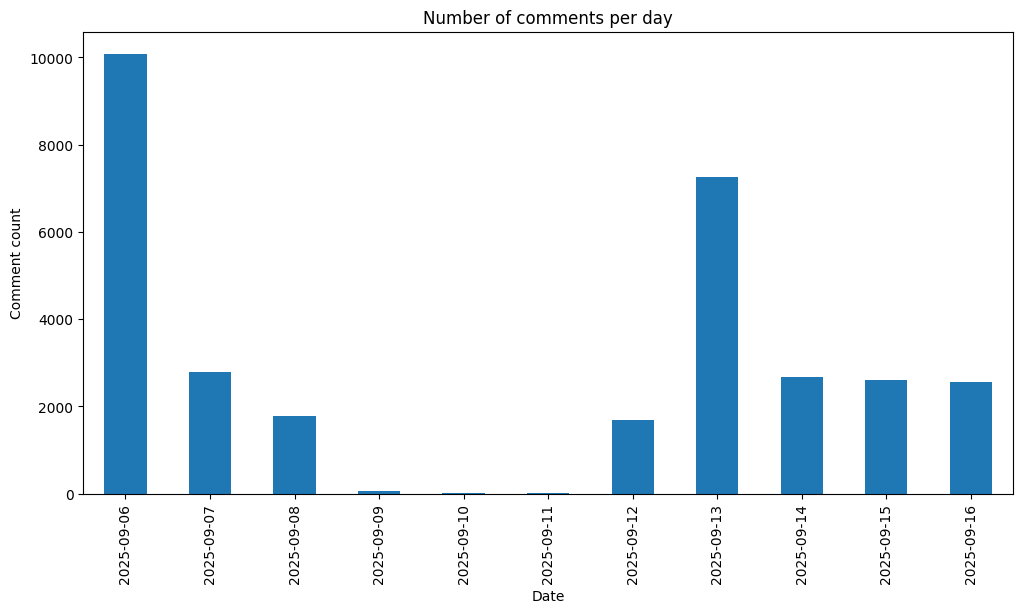

In [ ]:
# Count comments per day
counts = afl_merge.groupby(afl_merge["created_datetime_utc"].dt.date).size()

plt.figure(figsize=(12,6))
counts.plot(kind="bar")
plt.title("Number of comments per day")
plt.xlabel("Date")
plt.ylabel("Comment count")
plt.xticks(rotation=90)
plt.show()

In [51]:
afl_posts = pd.read_csv("afl_posts.csv")
afl_posts.columns

Index(['id', 'title', 'author', 'score', 'num_comments', 'created_utc',
       'created_datetime_utc', 'url', 'permalink', 'subreddit', 'over_18',
       'locked', 'stickied', 'is_self', 'selftext'],
      dtype='object')

In [52]:
afl_posts.created_datetime_utc.min()

'2025-08-26T06:47:36+00:00'